<a href="https://colab.research.google.com/github/HumbertoNunesLira/Modelo-preditivo-de-sobreviv-ncia-no-Titanic/blob/main/mini_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd


##Carregando os dados

In [5]:
# lendo o arquivo com os dados
df = pd.read_csv('titanic.csv')

##Explorando os dados

Embarque: C = Cherbourg, Q = Queenstown, S = Southampton

sobreviveu: 0 = nao , 1 = sim

sibsp: irmãos abordos


In [6]:
# Visualizando os dados
df

,passengerid,Sobreviveu,Classe,Nome,Sexo,Idade,sibsp,Pais_Filhos_Abordo,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
931,121,0,2.0,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
932,478,0,3.0,"Braund, Mr. Lewis Richard",man,29.0,1,0,3460,7.0458,NaN,S
933,838,0,3.0,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
934,791,0,3.0,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


In [7]:
# Visualizando algumas estatisticas
df.describe()

,passengerid,Sobreviveu,Classe,Idade,sibsp,Pais_Filhos_Abordo,Tarifa
count,936.000000,936.000000,927.000000,748.000000,936.000000,936.000000,936.000000
mean,446.438034,0.384615,2.314995,29.777634,0.519231,0.375000,31.647288
std,258.429453,0.486764,0.836545,15.842432,1.092343,0.796634,48.700700
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,672.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,194.000000,8.000000,6.000000,512.329200


In [8]:
#Explorando alguns dados
df[df['Idade'] >= 180]

,passengerid,Sobreviveu,Classe,Nome,Sexo,Idade,sibsp,Pais_Filhos_Abordo,Bilhete,Tarifa,Cabine,Embarque
152,153,0,3.0,"Meo, Mr. Alfonzo",man,194.0,0,0,A.5. 11206,8.05,NaN,S


In [9]:
#Explorando alguns dados em busca dos bebés abordo
df[df['Idade'] <= 1]

,passengerid,Sobreviveu,Classe,Nome,Sexo,Idade,sibsp,Pais_Filhos_Abordo,Bilhete,Tarifa,Cabine,Embarque
78,79,1,2.0,"Caldwell, Master. Alden Gates",man,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3.0,"Panula, Master. Eino Viljami",man,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3.0,"Johnson, Miss. Eleanor Ileen",women,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2.0,"Becker, Master. Richard F",Male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1.0,"Allison, Master. Hudson Trevor",mal,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3.0,"Nakid, Miss. Maria (""Mary"")",female_,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3.0,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3.0,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3.0,"Baclini, Miss. Eugenie",woman,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2.0,"Hamalainen, Master. Viljo",mal,0.67,1,1,250649,14.5000,NaN,S


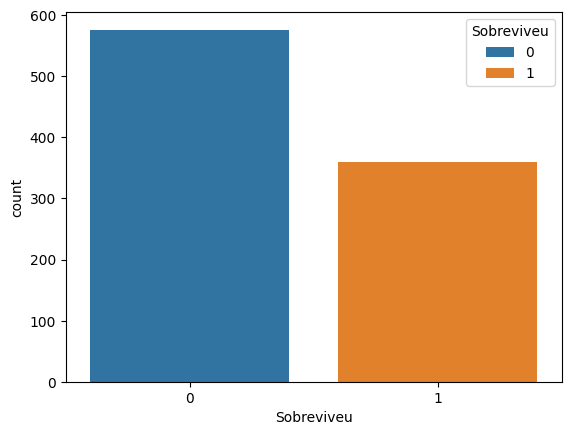

In [10]:
#grafico com seaborn para visualizar a quantidade de sobreviventes 0-não 1 - sim
sns.countplot(data = df, x = 'Sobreviveu', hue = 'Sobreviveu');

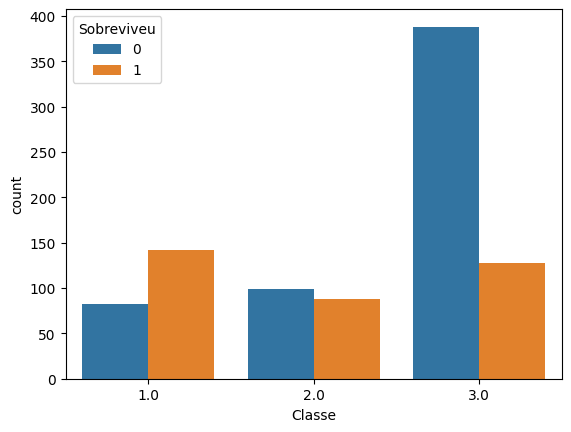

In [11]:
#grafico com seaborn para visualizar a quantidade de sobreviventes por classe
sns.countplot(data = df, x = 'Classe', hue = 'Sobreviveu');

##Tratamento dos dados ausentes

In [12]:
#Visualizando os dados ausentes
df.isnull().sum()

,0
passengerid,0
Sobreviveu,0
Classe,9
Nome,0
Sexo,46
Idade,188
sibsp,0
Pais_Filhos_Abordo,0
Bilhete,0
Tarifa,0


In [13]:
''' o erro durante o minicurso era os parametros,
    que so precisa botar o nome e logo depois
    o axis indicando se é coluna ou linha, no caso = 1
'''
df = df.drop('Cabine', axis = 1)

In [14]:
# adicionando a media das idades ao idades faltantes
df['Idade'] = df['Idade'].fillna(29.77)

In [15]:
# retirando as linhas com Embarque faltante do dataset
df = df.dropna(subset = 'Embarque')

In [16]:
# Precisamos ajustar as categorias na coluna sexo antes de preencher os valores faltantes
sexo = {
    'Female': 'mulher',
    'Female ': 'mulher',
    'female': 'mulher',
    'female_': 'mulher',
    'female  ': 'mulher',
    ' women': 'mulher',
    'women': 'mulher',
    'woman': 'mulher',
    ' female  ': 'mulher',

    'male': 'homem',
    'male ': 'homem',
    ' male': 'homem',
    'Male': 'homem',
    'man': 'homem',
    'mal': 'homem',
}


df.loc[:, 'Sexo'] = df['Sexo'].replace(sexo)

In [17]:
# Visualizando as categorias atuais em sexo depois do tratamento
df['Sexo'].unique()

array(['homem', 'mulher', nan], dtype=object)

In [18]:
# retirando as linhas com Classe faltante no dataset, pois temos pouco menos que 1% das linhas faltando esse dado
df = df.dropna(subset = 'Classe')

In [19]:
# precisamos preencher os dados faltantes em sexo, mas sem perder a porporcionalidade

proporcao = df['Sexo'].value_counts(normalize = True)

n_nulos = df['Sexo'].isnull().sum()


valores_preenchidos = np.random.choice(proporcao.index, size = n_nulos, p = proporcao)

df.loc[df['Sexo'].isnull(), 'Sexo'] = valores_preenchidos


In [20]:
# Visualizando que agora todos os dados nulos foram tratados
df.isnull().sum()

,0
passengerid,0
Sobreviveu,0
Classe,0
Nome,0
Sexo,0
Idade,0
sibsp,0
Pais_Filhos_Abordo,0
Bilhete,0
Tarifa,0


##Tratamento de dados inconsistente

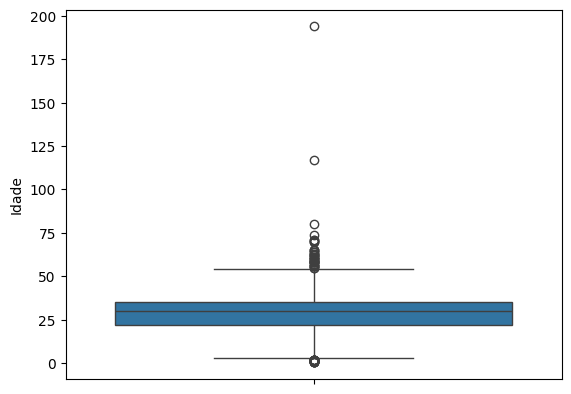

In [21]:
# visualizando os outliers presente na coluna idade
sns.boxplot(data = df, y = 'Idade')
plt.show()

In [22]:
# retirando linhas com idade acima de 80 anos
df = df[df['Idade'] < 80]

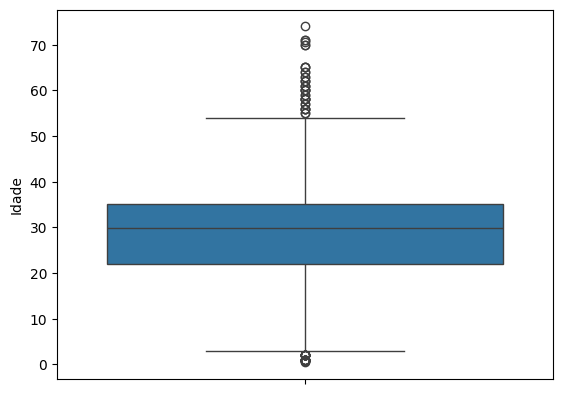

In [23]:
# visualizando o resultado do ajuste anterior
sns.boxplot(data = df, y = 'Idade')
plt.show()

In [24]:
# visualizando a dispersão dos dados
grafico_dispersao = px.scatter_matrix(df, dimensions= ['Idade', 'Tarifa', 'Classe'], color = 'Sobreviveu')
grafico_dispersao.show()

In [25]:
# Visualizando as relações entre sexo, classe e taxa de sobrevivência, para ajudar em insights.
px.parallel_categories(df, dimensions= ['Sexo', 'Classe', 'Sobreviveu'])

In [26]:
#visualizando os grupos usando a biblioteca plotly.express
px.treemap(df, path=['Sobreviveu', 'Sexo', 'Idade'])

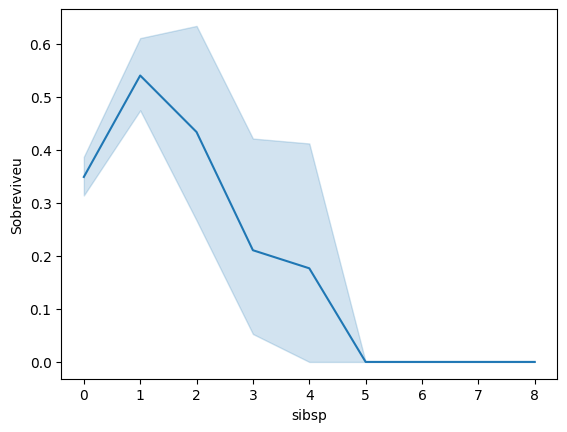

In [27]:
# nos da uma visao da probabilidade de uma pessoa sobreviver a depender da quantidade de irmaos abordo
sns.lineplot(data = df, x = 'sibsp', y = 'Sobreviveu');

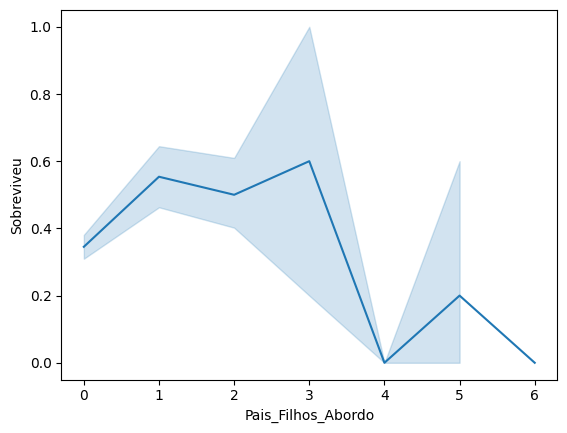

In [28]:
#nos da uma visão da probabilidade de uma pessoa sobreviver a depender da quantidade de parentes dependente abordo
sns.lineplot(data = df, x = 'Pais_Filhos_Abordo', y = 'Sobreviveu');

##Ajustando os dados para o treinamento

0.38898051454985944


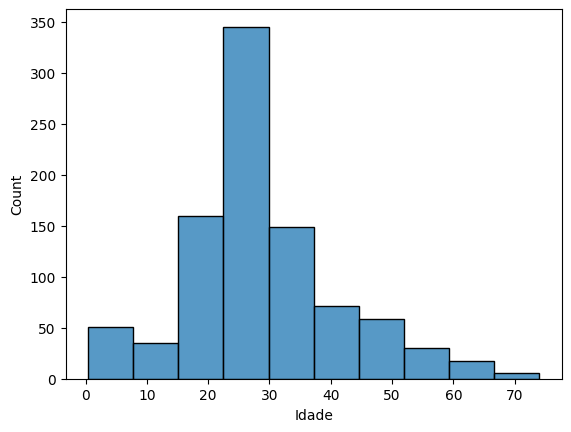

In [29]:
# visualizando a distribuição dos dados com ajuda de histogramas e vendo se segue uma normal ou tem simetria com skew()
sns.histplot(data = df, x = 'Idade', bins = 10)
print(df['Idade'].skew())

In [30]:
# visualizando a distribuição dos dados com ajuda de histogramas e vendo se segue uma normal ou tem simetria com skew()
print(df['Tarifa'].skew())

4.903923391883308


In [31]:
# aplicando tranformação logaritmica para ajustar a distribuição
df['Tarifa'] = np.log(df['Tarifa'] + 1)

0.4151659070773951


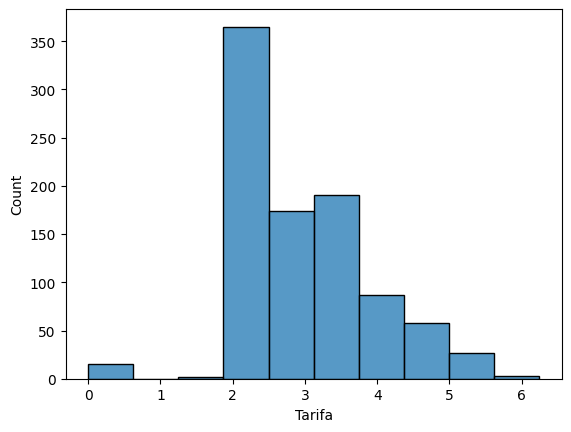

In [32]:
# verificando a distribuição apos aplicar o log
sns.histplot(data = df, x = 'Tarifa', bins = 10)
print(df['Tarifa'].skew())

In [33]:
#ajustando o peso para Classe

peso = {
    1 : 3,
    2 : 2,
    3 : 1
}


df['Peso_Classe'] = df['Classe'].replace(peso)

In [34]:
#importando modulo da biblioteca sklearn
from sklearn.preprocessing import LabelEncoder

In [35]:
#usando o labelencoder para classificar homem como 0 e mulher como 1

label_encoder = LabelEncoder()
df['Sexo'] = label_encoder.fit_transform(df['Sexo'])

In [36]:
df

,passengerid,Sobreviveu,Classe,Nome,Sexo,Idade,sibsp,Pais_Filhos_Abordo,Bilhete,Tarifa,Embarque,Peso_Classe
0,1,0,3.0,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,2.110213,S,1.0
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,4.280593,C,3.0
2,3,1,3.0,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,2.188856,S,1.0
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,3.990834,S,3.0
4,5,0,3.0,"Allen, Mr. William Henry",0,35.00,0,0,373450,2.202765,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
931,121,0,2.0,"Hickman, Mr. Stanley George",0,21.00,2,0,S.O.C. 14879,4.310799,S,2.0
932,478,0,3.0,"Braund, Mr. Lewis Richard",0,29.00,1,0,3460,2.085150,S,1.0
933,838,0,3.0,"Sirota, Mr. Maurice",0,29.77,0,0,392092,2.202765,S,1.0
934,791,0,3.0,"Keane, Mr. Andrew ""Andy""",0,29.77,0,0,12460,2.169054,Q,1.0


In [37]:
# selecionando os dados previsores
X_passageiros = df.iloc[:, [4,5,6,7,9,11] ].values

In [38]:
X_passageiros

array([[ 0.        , 22.        ,  1.        ,  0.        ,  2.1102132 ,
         1.        ],
       [ 1.        , 38.        ,  1.        ,  0.        ,  4.28059312,
         3.        ],
       [ 1.        , 26.        ,  0.        ,  0.        ,  2.18885633,
         1.        ],
       ...,
       [ 0.        , 29.77      ,  0.        ,  0.        ,  2.20276476,
         1.        ],
       [ 0.        , 29.77      ,  0.        ,  0.        ,  2.1690537 ,
         1.        ],
       [ 1.        , 45.        ,  0.        ,  1.        ,  2.73788081,
         1.        ]])

In [39]:
# selecionando os dados que serão a classe
y_passageiros = df.loc[:, 'Sobreviveu'].values

In [40]:
y_passageiros

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [41]:
#importando modulos da biblioteca sklearn
from sklearn.preprocessing import StandardScaler

In [42]:
#normalizando os dados

normalizar = StandardScaler()
X_passageiros[:, 1:5] = normalizar.fit_transform(X_passageiros[:, 1:5])

In [43]:
X_passageiros

array([[ 0.        , -0.58241886,  0.4398581 , -0.47111399, -0.87733611,
         1.        ],
       [ 1.        ,  0.68119339,  0.4398581 , -0.47111399,  1.39033503,
         3.        ],
       [ 1.        , -0.2665158 , -0.47560277, -0.47111399, -0.79516766,
         1.        ],
       ...,
       [ 0.        ,  0.03122284, -0.47560277, -0.47111399, -0.78063576,
         1.        ],
       [ 0.        ,  0.03122284, -0.47560277, -0.47111399, -0.81585798,
         1.        ],
       [ 1.        ,  1.23402376, -0.47560277,  0.78066439, -0.22153216,
         1.        ]])

In [44]:
#importando modulos da biblioteca sklearn para treinamento
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [45]:
#dividindo os dados para treino e para teste
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X_passageiros, y_passageiros, test_size = 0.30, random_state= 0 )

In [46]:
# criando o Modelo Bayesiano
Modelo_titanic = GaussianNB()

In [47]:
#  treinando o Modelo Bayesiano
Modelo_titanic.fit(X_treinamento, Y_treinamento)

GaussianNB()

In [48]:
# Fazendo previsões com 30% dos dados que nao foram usado para treinamento
previsoes = Modelo_titanic.predict(X_teste)

In [49]:
# os resultados da previsao do modelo nos 30% dos dados que nao foram usados no treinamento
previsoes

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [50]:
# os verdadeiros resultados dos 30% dos dados que nao foram usados no treinamento
Y_teste


array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [54]:
#modulo para ver a % de acertos no modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [55]:
# Avaliação do modelo treinado, 76% de acertos, o que é um bom resultado para esse tipo de modelo dado o problema
accuracy_score(Y_teste, previsoes)

0.7653429602888087

In [57]:
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       161
           1       0.72      0.72      0.72       116

    accuracy                           0.77       277
   macro avg       0.76      0.76      0.76       277
weighted avg       0.77      0.77      0.77       277



In [59]:
confusion_matrix(Y_teste, previsoes)

array([[129,  32],
       [ 33,  83]])